<a href="https://colab.research.google.com/github/prajachintya/Course_IORS/blob/main/KNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Import libraries**


In [ ]:
!pip install earthpy

In [283]:
from osgeo import gdal
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from gdalconst import *
import pandas as pd
from scipy.spatial import distance_matrix
import earthpy.plot as ep
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

** italicized text2) Import image**

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
%cd /content/drive/MyDrive/Colab Notebooks/citra

/content/drive/MyDrive/Colab Notebooks/citra


In [240]:
# open dataset
filename = "/content/drive/MyDrive/Colab Notebooks/citra/citra_new.tif"
dataset = gdal.Open(filename, GA_ReadOnly)

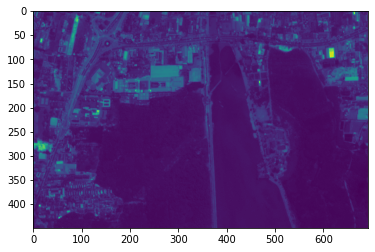

In [241]:
rb = dataset.GetRasterBand(3)
img_array = rb.ReadAsArray()
plt.imshow(img_array)

plt.show()

In [242]:
img_array.shape

(449, 693)

In [243]:
# retrieve metadata from raster
rows = dataset.RasterYSize
columns = dataset.RasterXSize
N = rows * columns
bands = dataset.RasterCount

In [244]:
# print basic metadata
print ("image metadata:") 
print (rows, "rows x", columns, "columns x", bands, "bands")

image metadata:
449 rows x 693 columns x 5 bands


**3) Retrieve RGB arrays from input image**

In [245]:
array_R = dataset.GetRasterBand(1).ReadAsArray().astype(int)
array_G = dataset.GetRasterBand(2).ReadAsArray().astype(int)
array_B = dataset.GetRasterBand(3).ReadAsArray().astype(int)
array_RGB = np.zeros((rows, columns, 3), dtype=np.uint8)
array_RGB[:,:,0] = array_R
array_RGB[:,:,1] = array_G
array_RGB[:,:,2] = array_B
array_RGB_copy = array_RGB.copy()

# print(array_RGB_copy)

In [246]:
array_RGB.shape

(449, 693, 3)

In [247]:
array_RGB = array_RGB.reshape((449*693, 3))

In [248]:
array_RGB

array([[156,  43, 177],
       [ 59, 198,  72],
       [ 33, 151,  18],
       ...,
       [ 63, 226,  69],
       [ 52, 211,  51],
       [ 42, 199,  40]], dtype=uint8)

**4) Import samples**

four classes, 50 samples data each class
*   Vegetation (1)
*   Water (2)
*   Build area (3)
*   Road (4)

In [249]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/citra/class_samples.csv').values.tolist()

In [ ]:
df

**5) Distance matrix calculation**

In [251]:
distance_mat = []

for sample in df:
  row_sample = sample[1]
  column_sample = sample[0]
  r_sample = array_RGB_copy[row_sample, column_sample, 0]
  g_sample = array_RGB_copy[row_sample, column_sample, 1]
  b_sample = array_RGB_copy[row_sample, column_sample, 2]
  rgb = np.array([r_sample, g_sample, b_sample]).flatten().reshape(1,3)
  distance_mat.append(distance_matrix(array_RGB, rgb))

  

In [252]:
np.asarray(distance_mat).shape

(200, 311157, 1)

In [253]:
distance_matrix = np.asarray(distance_mat)

In [254]:
distance_matrix = np.reshape(distance_matrix, (distance_matrix.shape[0], distance_matrix.shape[1]), order="C")

In [255]:
distance_matrix.T

array([[132.44244033, 253.10472141, 242.03098975, ..., 203.39616516,
        145.85952146, 190.80094339],
       [183.50476833,  54.56189146,  32.31098884, ...,  93.42911752,
        275.33979008,  48.76474136],
       [154.52184312, 116.73045875,  88.79752249, ..., 138.75878351,
        322.4856586 ,  97.34988444],
       ...,
       [211.50177304,  26.15339366,  18.68154169, ...,  89.79977728,
        283.55775426,  56.25833272],
       [199.1607391 ,  45.89117562,  21.04756518, ...,  99.50879358,
        297.86406295,  60.67124525],
       [190.60430216,  63.77303505,  36.24913792, ..., 111.54819586,
        308.85919122,  70.83784299]])

In [256]:
distance_matrix.shape

(200, 311157)

In [257]:
distance_matrix=distance_matrix.T

In [258]:
distance_matrix.shape

(311157, 200)

**6) Sorting distances**

In [259]:
k = 10
sortedDist = np.argsort(distance_matrix)

tensmallest= sortedDist [:,:k]

In [260]:
np.where(sortedDist < 50)

(array([     0,      0,      0, ..., 311156, 311156, 311156]),
 array([  8,  10,  19, ..., 127, 136, 164]))

In [261]:
sortedDist[20000]

array([164, 130, 189, 168, 158, 152, 195, 184, 191, 198, 180, 185, 122,
       128, 182, 121,  88, 134, 110, 146, 143, 131, 102, 150, 139, 147,
       138, 181, 119,  41, 106,  82,  87,  81, 161,  14, 129,  63, 151,
        86, 105,  90, 114,  84, 179, 125,  95, 148,  34, 160, 144, 149,
       190, 197,  73, 109,  68, 194, 132, 175, 120, 157,  69, 163, 176,
        75, 156, 107,  40, 141, 165, 142, 135, 199,  92, 115,  62, 155,
       117, 111,  10,  74,  77, 183, 104, 169,  65,  76, 192, 187,  96,
       153, 173, 133,  67, 193,  58,  54,  57, 103,  53,  52, 166,   7,
        55,  61,  72,  83,  78,  99, 172, 127,  94,  79, 112,  85,  50,
        51,  97, 177,  60,  80,  71,  56,  93,  70, 140,  39, 108,  33,
       124,  98,  59, 162, 145,  38,  66, 154, 174, 123, 170,   6, 159,
       178,  36,  64,  43,  89, 186,  15, 113, 196,  47,  44,  18,  46,
        49, 136,  23,  31,  16,  21,   8, 126,  42,  91,  32, 171,   4,
         3,   0,  13, 188,   9,   1,  19, 101,  12,  11,   5,   

In [262]:
tensmallest.shape

(311157, 10)

**7) Reclassify based on class label**

In [263]:
class_matrix = np.empty(shape=(311157,10))

for i in range(len(tensmallest)):
  for k in range(len(tensmallest[i])):
    if tensmallest[i][k] < 51:
      class_matrix[i][k] = 1
    if tensmallest[i][k] > 50 and tensmallest[i][k] < 101 :
      class_matrix[i][k] = 2
    if tensmallest[i][k] > 100 and tensmallest[i][k] < 151 :
      class_matrix[i][k] = 3
    if tensmallest[i][k] > 150 and tensmallest[i][k] < 201 :
      class_matrix[i][k] = 4

In [264]:
class_matrix = class_matrix.astype(int)
class_matrix

array([[3, 2, 2, ..., 2, 1, 2],
       [2, 4, 4, ..., 1, 1, 1],
       [4, 2, 3, ..., 3, 1, 1],
       ...,
       [1, 1, 4, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 2, 1],
       [1, 1, 1, ..., 1, 1, 2]])

In [265]:
class_matrix.shape

(311157, 10)

**8) Count the most frequent class**

In [266]:
b = ([[np.bincount(row).argmax()] for row in class_matrix])

print(b)

[[2], [1], [4], [2], [3], [4], [3], [3], [4], [1], [2], [4], [4], [4], [4], [4], [3], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [1], [3], [4], [4], [3], [4], [4], [4], [3], [4], [1], [1], [4], [4], [3], [4], [4], [4], [4], [4], [4], [2], [2], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [3], [3], [4], [2], [2], [2], [4], [2], [2], [2], [2], [2], [4], [4], [4], [4], [4], [2], [3], [3], [3], [3], [4], [4], [4], [3], [2], [2], [4], [4], [3], [3], [4], [3], [3], [3], [3], [3], [3], [4], [4], [3], [3], [3], [4], [4], [4], [1], [3], [3], [3], [4], [3], [4], [4], [2], [2], [2], [2], [2], [2], [4], [4], [1], [1], [2], [3], [3], [1], [3], [4], [3], [4], [3], [3], [3], [1], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [3], [1], [4], [4], [4], [2], [4], [4], [2], [2], [2], [2], [4], [4], [1], [3], [3], [3], [4], [4], [3], [3], [3], [3], [3], [3], [4], [3], [2], [4], [4], [4], [3], [4], [1], [3], [4], [4], [3], [4], [4], [2], [3], [4], [4],

In [267]:
classification_array = np.asarray(b)

In [268]:
classification_array

array([[2],
       [1],
       [4],
       ...,
       [1],
       [1],
       [1]])

In [269]:
image_classification = np.reshape(classification_array, (rows, columns))

In [270]:
image_classification.shape


(449, 693)

**9) Plot Classification Result**

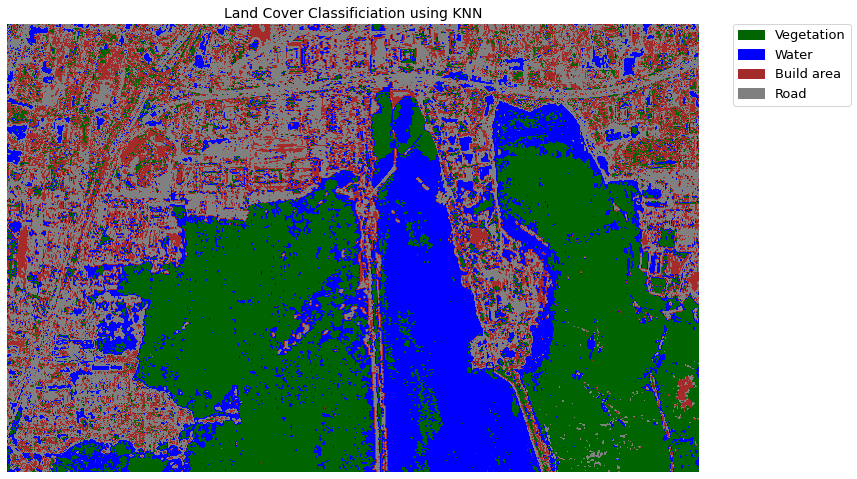

In [271]:
# Define color map
lu_colors = ["darkgreen", "blue", "brown", "gray"]
lu_cmap = ListedColormap(lu_colors)

# Define class names
lu_cat_names = [
    "Vegetation",
    "Water",
    "Build area",
    "Road",   
]

# Get list of classes
classes = np.unique(image_classification)
classes = classes.tolist()
classes = classes[0:4]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(image_classification, cmap=lu_cmap)

# ep.draw_legend
ep.draw_legend(im_ax=im, classes=classes, titles=lu_cat_names)
ax.set_title(
    "Land Cover Classificiation using KNN",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

**10) Evaluation : Calculate confusion matrix**

In [272]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/citra/test1.csv').values.tolist()

In [273]:
tests = np.asarray(test)

In [274]:
predict = []
for test in tests:
    row_sample = test[0]
    column_sample = test[1]
    #check.append([column_sample,row_sample,axx[row_sample, column_sample]])
    predict.append(image_classification[row_sample, column_sample])

In [275]:
predict= np.asarray(predict)

In [276]:
test_label = []

for i in range (len(tests)):
  test_label.append(tests[i][2])

In [279]:
#confussion matrix
cf_matrix = confusion_matrix(predict, test_label)

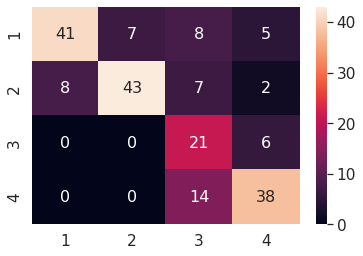

In [282]:
import seaborn as sn

array = cf_matrix

df_cm = pd.DataFrame(array, index = [i for i in "1234"],
                  columns = [i for i in "1234"])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [286]:
#accuracy
accuracy_score(predict, test_label)

0.715

In [288]:
#precision
precision_score(predict, test_label, average=None)

array([0.83673469, 0.86      , 0.42      , 0.74509804])